Import all the nescessary libraries 

In [102]:
#import libraries

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [58]:
#import additional stock libraries

import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

In [59]:
#set the list of the stock I want to analyze

doge = ['MSFT']

In [60]:
#set starting and ending points

finish = datetime.now()
begin = datetime(finish.year-1, finish.month, finish.day)

In [61]:
#read the stock list of MSFT into dataReader library with starting and ending points 

for micro in doge:
    globals()[micro] = web.DataReader(micro, 'yahoo', begin, finish)


In [62]:
MSFT.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,223.951977,219.295415,221.583122,221.718340,3.069310e+07,220.509568
std,18.450685,18.775973,18.618926,18.594074,1.003269e+07,19.037234
min,183.000000,180.410004,182.539993,182.830002,1.055060e+07,181.076721
25%,211.330002,206.720001,209.350006,208.899994,2.382300e+07,207.183945
50%,218.039993,213.929993,215.910004,216.470001,2.879840e+07,215.017136
75%,238.000000,232.429993,235.990005,235.770004,3.431030e+07,235.226837
max,263.190002,260.170013,261.660004,261.970001,7.898300e+07,261.366486


<AxesSubplot:xlabel='Date'>

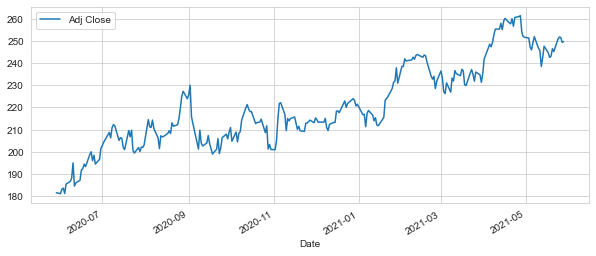

In [63]:
#plot the adjusted close price of Microsoft 

MSFT['Adj Close'].plot(legend=True, figsize = (10,4))

<AxesSubplot:xlabel='Date'>

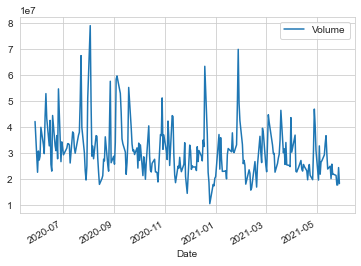

In [64]:
#plot volume of MSFT 

MSFT['Volume'].plot(legend = True)

In [71]:
#create a list for day moving averages
#calculate rolling mean moving averages for each of the indexs in the list 

moving = [10,20,50,75]

for mavg in moving:
    column_name = "mavg for %s days" %(str(mavg))
    MSFT[column_name] = MSFT['Adj Close'].rolling(mavg).mean()



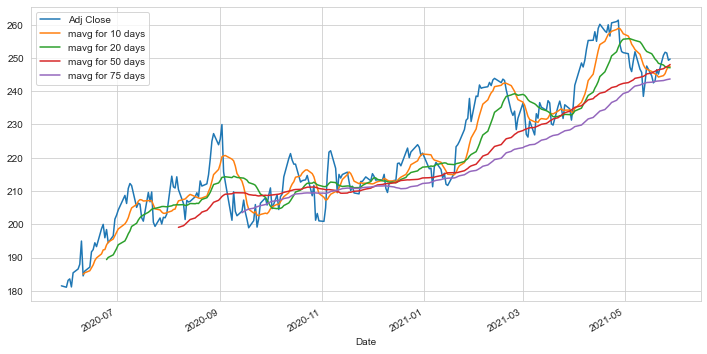

In [72]:
#subplots = false is to get all plots instead of displaying each plot

MSFT[['Adj Close','mavg for 10 days','mavg for 20 days','mavg for 50 days','mavg for 75 days']].plot(subplots=False,figsize = (12,6))
plt.show()


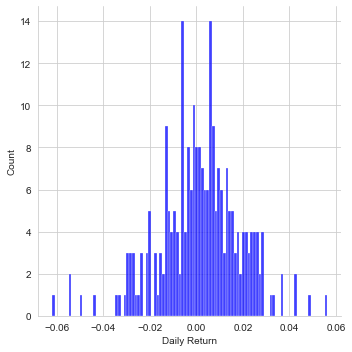

In [84]:
#histogram if daily returns
#create 'Daily Return' using % change in adjusted close price

MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()
sns.displot(MSFT['Daily Return'].dropna(), bins=100, color='blue')

In [92]:

close = web.DataReader(doge,'yahoo',begin,finish)['Adj Close']
close.head()


Symbols,MSFT
Date,
2020-05-29,181.492691
2020-06-01,181.076721
2020-06-02,183.136765
2020-06-03,183.582458
2020-06-04,181.165863


In [93]:
gains = close.pct_change()

In [94]:
days = 365
dt = 1/days
mu = gains.mean()['MSFT']
sigma = gains.std()['MSFT']



In [99]:
def montecarlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1]+price[x-1]*(drift[x]+shock[x])
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for MSFT')

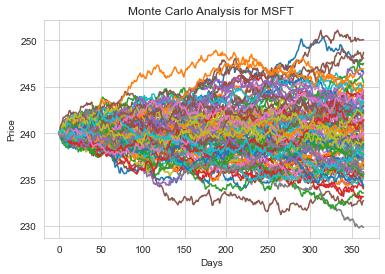

In [101]:
start_price = 240

for run in range(100):
    plt.plot(montecarlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for MSFT')

In [ ]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean price ending
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

# 99% variance of price
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# plot line at 1% result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for TSLA after %s days\n" % days, weight='bold');

In [105]:
runs = 1000
simulation = np.zeros(runs)

for nice in range(runs):
    simulation[nice] = montecarlo(start_price,days,mu,sigma)[days-1]

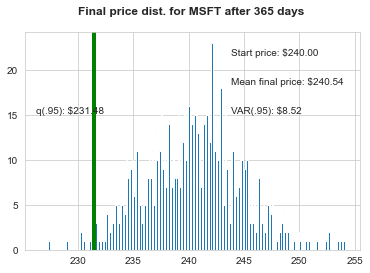

In [116]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)
plt.figtext(.6,.8, s='Start price: $%.2f' %start_price)

plt.figtext(.6,.7, s='Mean final price: $%.2f' %simulation.mean())

plt.figtext(.6,.6, 'VAR(.95): $%.2f'% (start_price - q,))

plt.figtext(.15, .6, 'q(.95): $%.2f'%q)

plt.axvline(x=q, linewidth=4, color = 'g')

plt.title("Final price dist. for MSFT after %s days \n" %days, weight = 'bold');
